In [ ]:
import pandas as pd

######### 1
df = pd.read_csv("rand1_results.csv")

last_population = df["population"].max()

last_pop_df = df[df["population"] == last_population]

best_row = last_pop_df.loc[last_pop_df["RMSE"].idxmin()]

print("Rand/1")
print(f"population {int(best_row['population'])} with RMSE = {best_row['RMSE']:.4f} : "
      f"lr = {best_row['lr']:.4f}, depth = {int(best_row['depth'])}, reg = {best_row['reg']:.4f}, \n")

######### 2
df = pd.read_csv("best1_results.csv")

last_population = df["population"].max()

last_pop_df = df[df["population"] == last_population]

best_row = last_pop_df.loc[last_pop_df["RMSE"].idxmin()]

print("Best/1")
print(f"population {int(best_row['population'])} with RMSE = {best_row['RMSE']:.4f} : "
      f"lr = {best_row['lr']:.4f}, depth = {int(best_row['depth'])}, reg = {best_row['reg']:.4f}, \n")
######### 3
df = pd.read_csv("hybrid_results.csv")

last_population = df["population"].max()

last_pop_df = df[df["population"] == last_population]

best_row = last_pop_df.loc[last_pop_df["RMSE"].idxmin()]


print("Hybrid")
print(f"population {int(best_row['population'])} with RMSE = {best_row['RMSE']:.4f} : "
      f"lr = {best_row['lr']:.4f}, depth = {int(best_row['depth'])}, reg = {best_row['reg']:.4f}, \n")
######### 4
df = pd.read_csv("ctb1_results.csv")

last_population = df["population"].max()

last_pop_df = df[df["population"] == last_population]

best_row = last_pop_df.loc[last_pop_df["RMSE"].idxmin()]

print("current_to_best/1")
print(f"population {int(best_row['population'])} with RMSE = {best_row['RMSE']:.4f} : "
      f"lr = {best_row['lr']:.4f}, depth = {int(best_row['depth'])}, reg = {best_row['reg']:.4f}, \n")
######### 5
df = pd.read_csv("rtb1_results.csv")

last_population = df["population"].max()

last_pop_df = df[df["population"] == last_population]

best_row = last_pop_df.loc[last_pop_df["RMSE"].idxmin()]

print("Rand_to_best/1")
print(f"population {int(best_row['population'])} with RMSE = {best_row['RMSE']:.4f} : "
      f"lr = {best_row['lr']:.4f}, depth = {int(best_row['depth'])}, reg = {best_row['reg']:.4f}, \n")

Rand/1
population 5 with RMSE = 45.4789 : lr = 0.1203, depth = 11, reg = 1.2305, 

Best/1
population 8 with RMSE = 44.9999 : lr = 0.1633, depth = 6, reg = 0.8791, 

Hybrid
population 5 with RMSE = 45.4826 : lr = 0.1056, depth = 10, reg = 0.5251, 

current_to_best/1
population 6 with RMSE = 45.7194 : lr = 0.1165, depth = 10, reg = 1.3933, 

Rand_to_best/1
population 7 with RMSE = 45.4480 : lr = 0.1057, depth = 10, reg = 0.5242, 



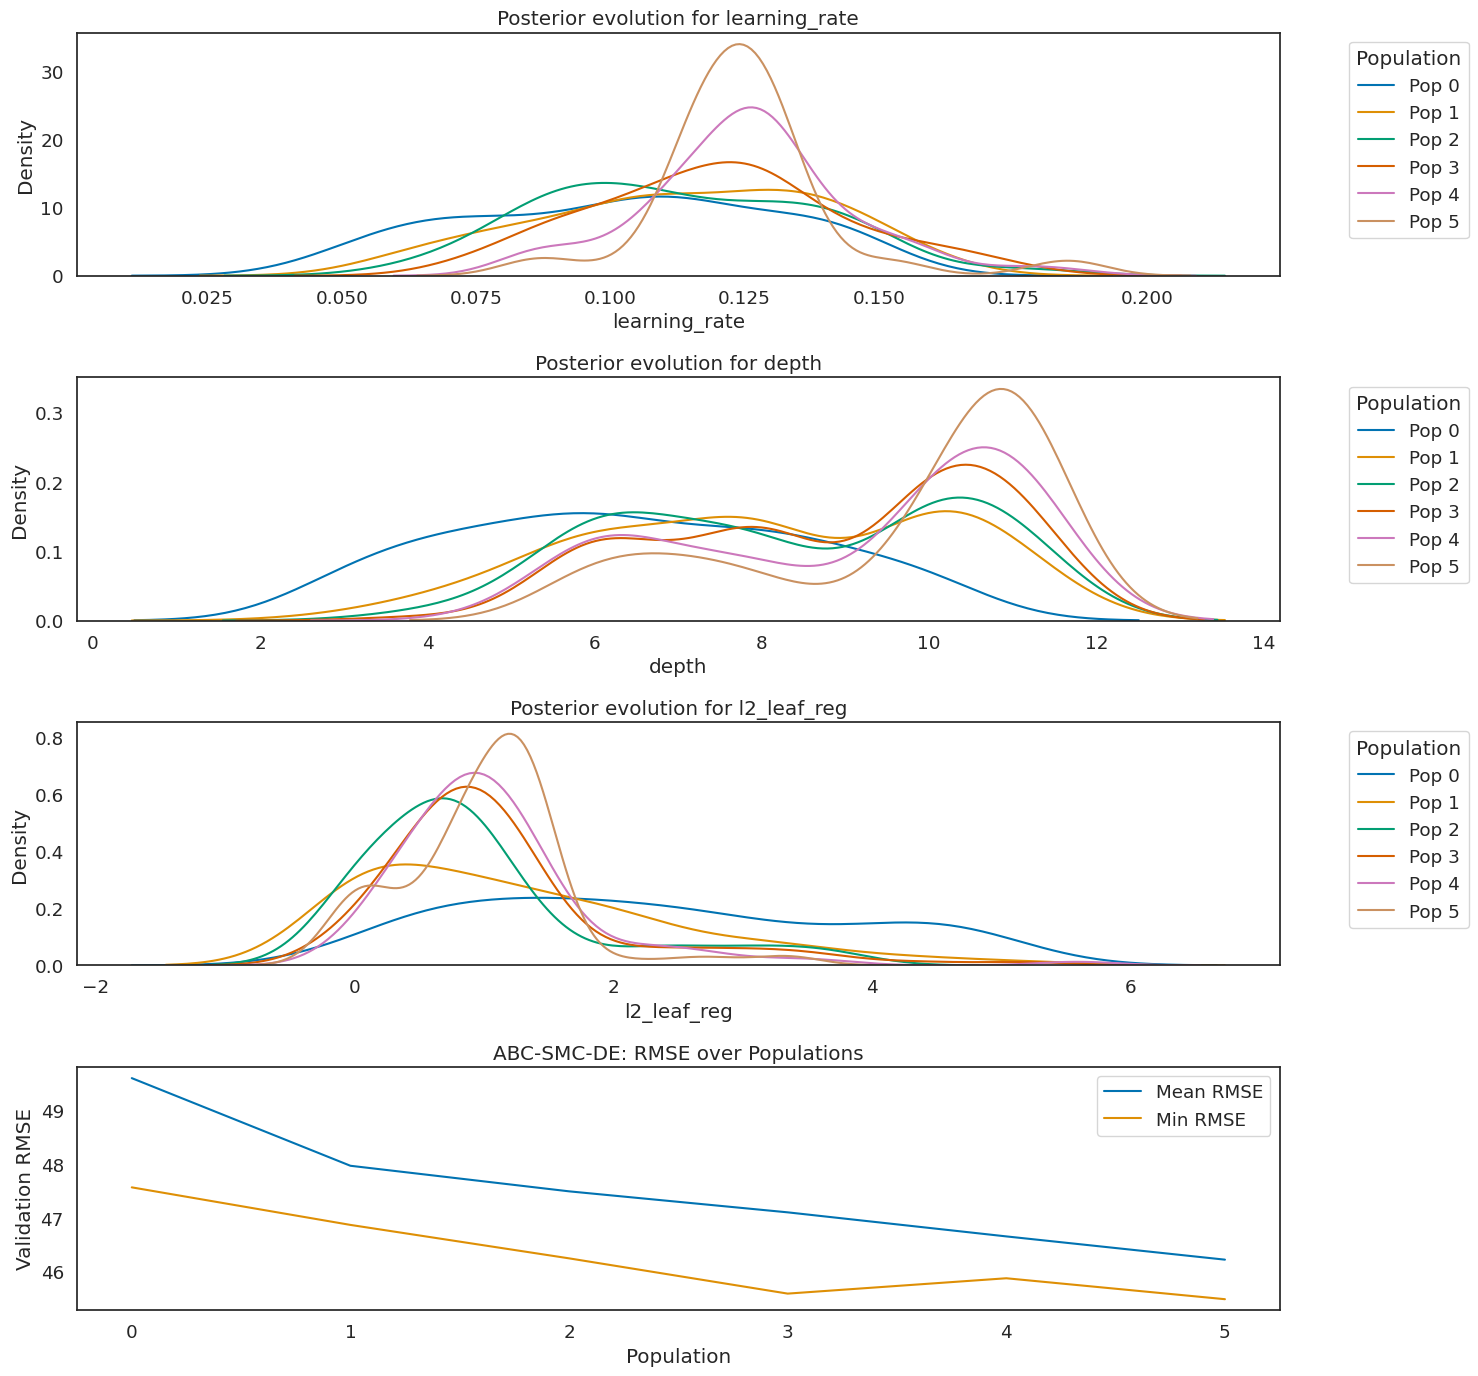

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("rand1_results.csv")

df.rename(columns={"lr": "learning_rate", "reg": "l2_leaf_reg"}, inplace=True)

sns.set(style="white", palette="colorblind", font_scale=1.2)

fig, axs = plt.subplots(4, 1, figsize=(15, 14), sharex=False)

for pop, group in df.groupby("population"):
    if group["learning_rate"].nunique() > 1:
        sns.kdeplot(data=group, x="learning_rate", ax=axs[0], label=f"Pop {pop}")
    else:
        axs[0].scatter([group["learning_rate"].iloc[0]], [0.01], label=f"Pop {pop}", marker='|', s=200)
axs[0].legend(title="Population", bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].set_title("Posterior evolution for learning_rate")

for pop, group in df.groupby("population"):
    if group["depth"].nunique() > 1:
        sns.kdeplot(data=group, x="depth", ax=axs[1], label=f"Pop {pop}")
    else:
        axs[1].scatter([group["depth"].iloc[0]], [0.01], label=f"Pop {pop}", marker='|', s=200)
axs[1].legend(title="Population", bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].set_title("Posterior evolution for depth")

for pop, group in df.groupby("population"):
    if group["l2_leaf_reg"].nunique() > 1:
        sns.kdeplot(data=group, x="l2_leaf_reg", ax=axs[2], label=f"Pop {pop}")
    else:
        axs[2].scatter([group["l2_leaf_reg"].iloc[0]], [0.01], label=f"Pop {pop}", marker='|', s=200)
axs[2].legend(title="Population", bbox_to_anchor=(1.05, 1), loc='upper left')
axs[2].set_title("Posterior evolution for l2_leaf_reg")

mean_rmse = df.groupby("population")["RMSE"].mean()
min_rmse = df.groupby("population")["RMSE"].min()

axs[3].plot(mean_rmse.index, mean_rmse.values, label="Mean RMSE")
axs[3].plot(min_rmse.index, min_rmse.values, label="Min RMSE")
axs[3].set_title("ABC-SMC-DE: RMSE over Populations")
axs[3].set_xlabel("Population")
axs[3].set_ylabel("Validation RMSE")
axs[3].legend()

plt.tight_layout()
plt.show()


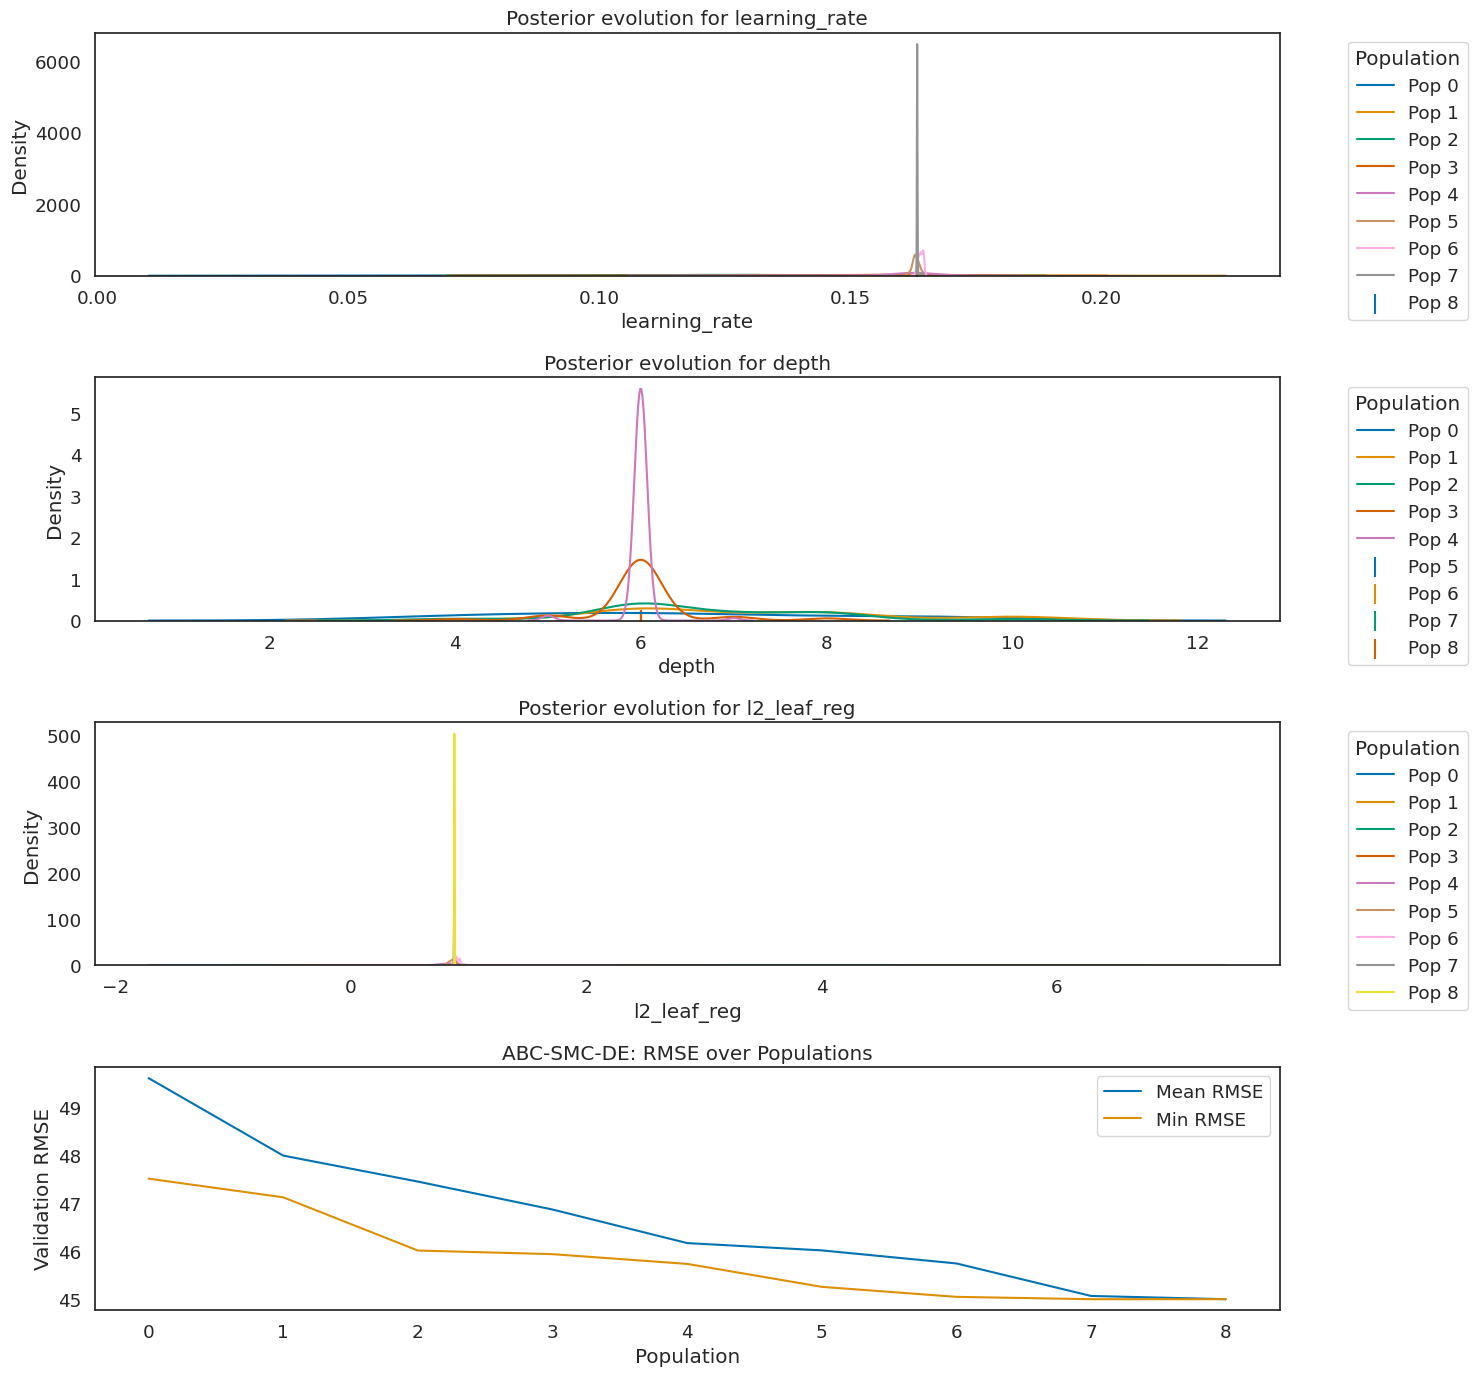

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("best1_results.csv")

df.rename(columns={"lr": "learning_rate", "reg": "l2_leaf_reg"}, inplace=True)

sns.set(style="white", palette="colorblind", font_scale=1.2)

fig, axs = plt.subplots(4, 1, figsize=(15, 14), sharex=False)

for pop, group in df.groupby("population"):
    if group["learning_rate"].nunique() > 1:
        sns.kdeplot(data=group, x="learning_rate", ax=axs[0], label=f"Pop {pop}")
    else:
        axs[0].scatter([group["learning_rate"].iloc[0]], [0.01], label=f"Pop {pop}", marker='|', s=200)
axs[0].legend(title="Population", bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].set_title("Posterior evolution for learning_rate")

for pop, group in df.groupby("population"):
    if group["depth"].nunique() > 1:
        sns.kdeplot(data=group, x="depth", ax=axs[1], label=f"Pop {pop}")
    else:
        axs[1].scatter([group["depth"].iloc[0]], [0.01], label=f"Pop {pop}", marker='|', s=200)
axs[1].legend(title="Population", bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].set_title("Posterior evolution for depth")

for pop, group in df.groupby("population"):
    if group["l2_leaf_reg"].nunique() > 1:
        sns.kdeplot(data=group, x="l2_leaf_reg", ax=axs[2], label=f"Pop {pop}")
    else:
        axs[2].scatter([group["l2_leaf_reg"].iloc[0]], [0.01], label=f"Pop {pop}", marker='|', s=200)
axs[2].legend(title="Population", bbox_to_anchor=(1.05, 1), loc='upper left')
axs[2].set_title("Posterior evolution for l2_leaf_reg")

mean_rmse = df.groupby("population")["RMSE"].mean()
min_rmse = df.groupby("population")["RMSE"].min()

axs[3].plot(mean_rmse.index, mean_rmse.values, label="Mean RMSE")
axs[3].plot(min_rmse.index, min_rmse.values, label="Min RMSE")
axs[3].set_title("ABC-SMC-DE: RMSE over Populations")
axs[3].set_xlabel("Population")
axs[3].set_ylabel("Validation RMSE")
axs[3].legend()

plt.tight_layout()
plt.show()


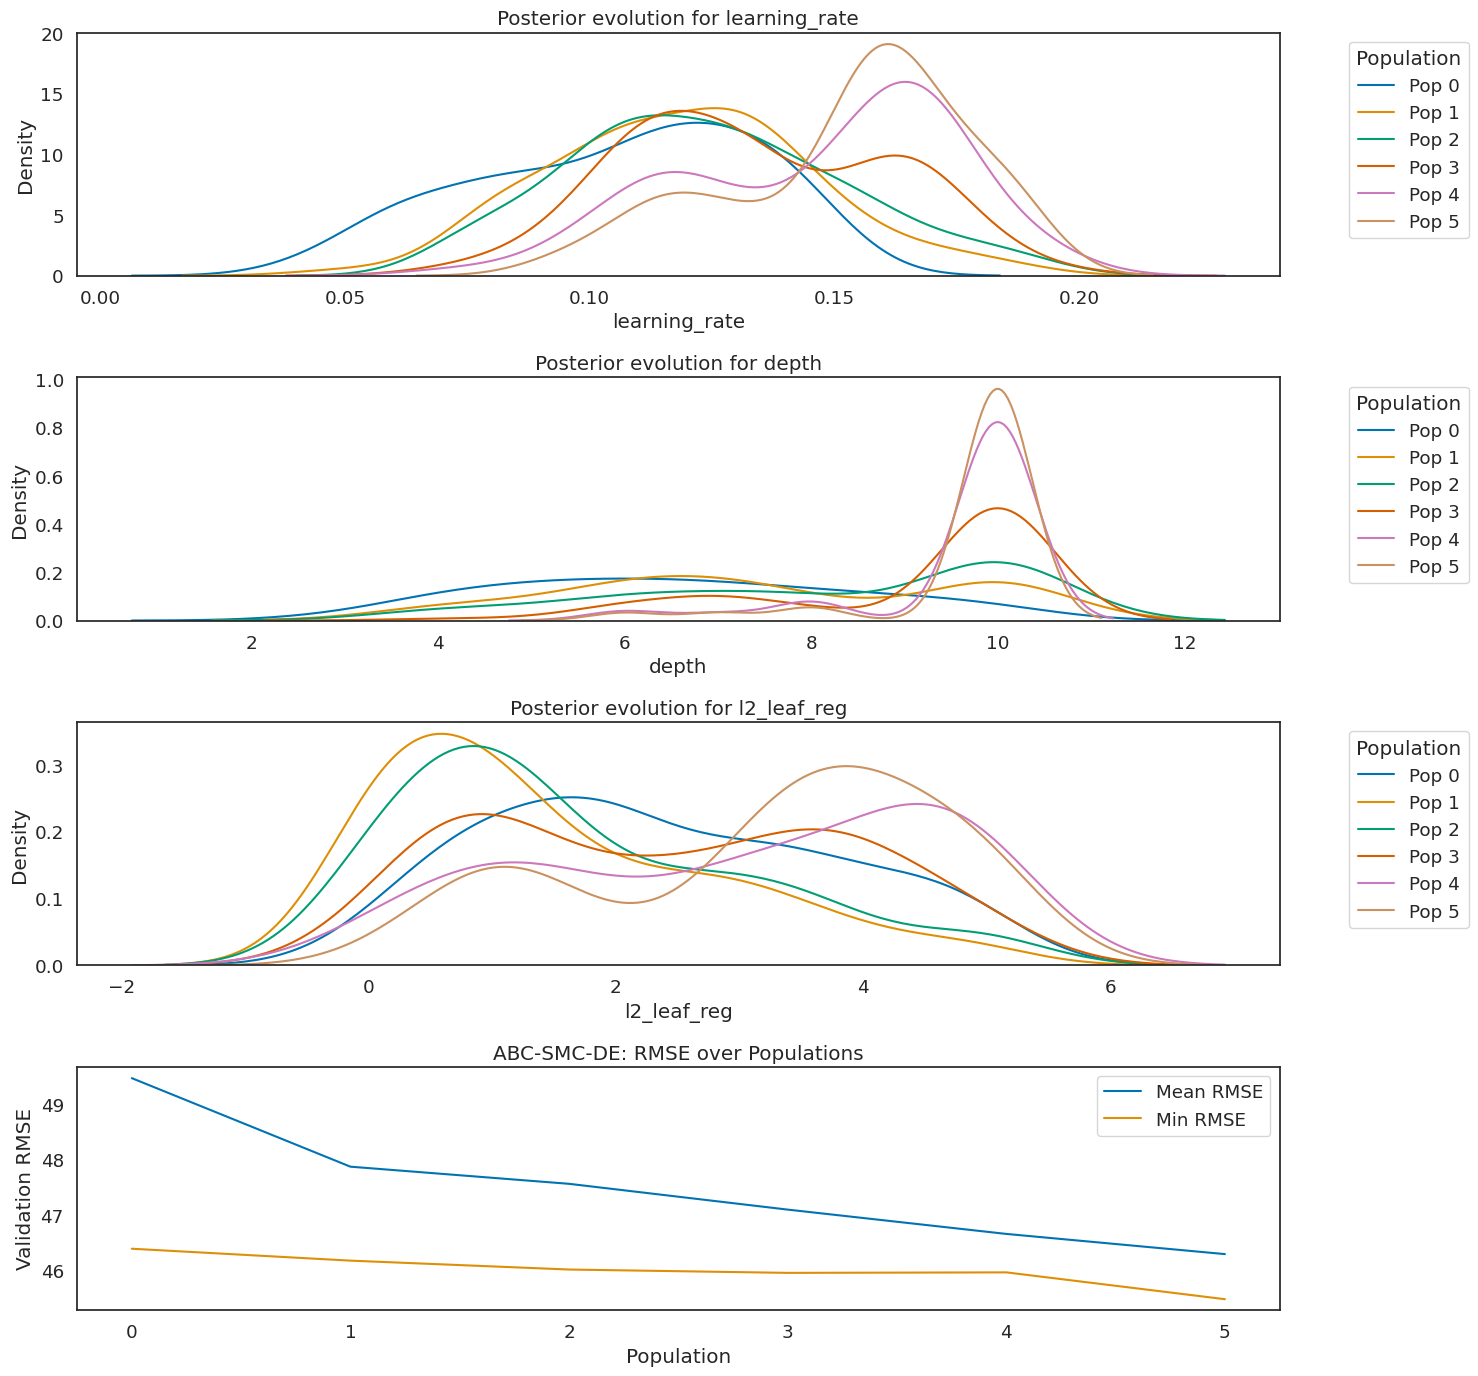

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("hybrid_results.csv")

df.rename(columns={"lr": "learning_rate", "reg": "l2_leaf_reg"}, inplace=True)

sns.set(style="white", palette="colorblind", font_scale=1.2)

fig, axs = plt.subplots(4, 1, figsize=(15, 14), sharex=False)

for pop, group in df.groupby("population"):
    if group["learning_rate"].nunique() > 1:
        sns.kdeplot(data=group, x="learning_rate", ax=axs[0], label=f"Pop {pop}")
    else:
        axs[0].scatter([group["learning_rate"].iloc[0]], [0.01], label=f"Pop {pop}", marker='|', s=200)
axs[0].legend(title="Population", bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].set_title("Posterior evolution for learning_rate")

for pop, group in df.groupby("population"):
    if group["depth"].nunique() > 1:
        sns.kdeplot(data=group, x="depth", ax=axs[1], label=f"Pop {pop}")
    else:
        axs[1].scatter([group["depth"].iloc[0]], [0.01], label=f"Pop {pop}", marker='|', s=200)
axs[1].legend(title="Population", bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].set_title("Posterior evolution for depth")

for pop, group in df.groupby("population"):
    if group["l2_leaf_reg"].nunique() > 1:
        sns.kdeplot(data=group, x="l2_leaf_reg", ax=axs[2], label=f"Pop {pop}")
    else:
        axs[2].scatter([group["l2_leaf_reg"].iloc[0]], [0.01], label=f"Pop {pop}", marker='|', s=200)
axs[2].legend(title="Population", bbox_to_anchor=(1.05, 1), loc='upper left')
axs[2].set_title("Posterior evolution for l2_leaf_reg")

mean_rmse = df.groupby("population")["RMSE"].mean()
min_rmse = df.groupby("population")["RMSE"].min()

axs[3].plot(mean_rmse.index, mean_rmse.values, label="Mean RMSE")
axs[3].plot(min_rmse.index, min_rmse.values, label="Min RMSE")
axs[3].set_title("ABC-SMC-DE: RMSE over Populations")
axs[3].set_xlabel("Population")
axs[3].set_ylabel("Validation RMSE")
axs[3].legend()

plt.tight_layout()
plt.show()


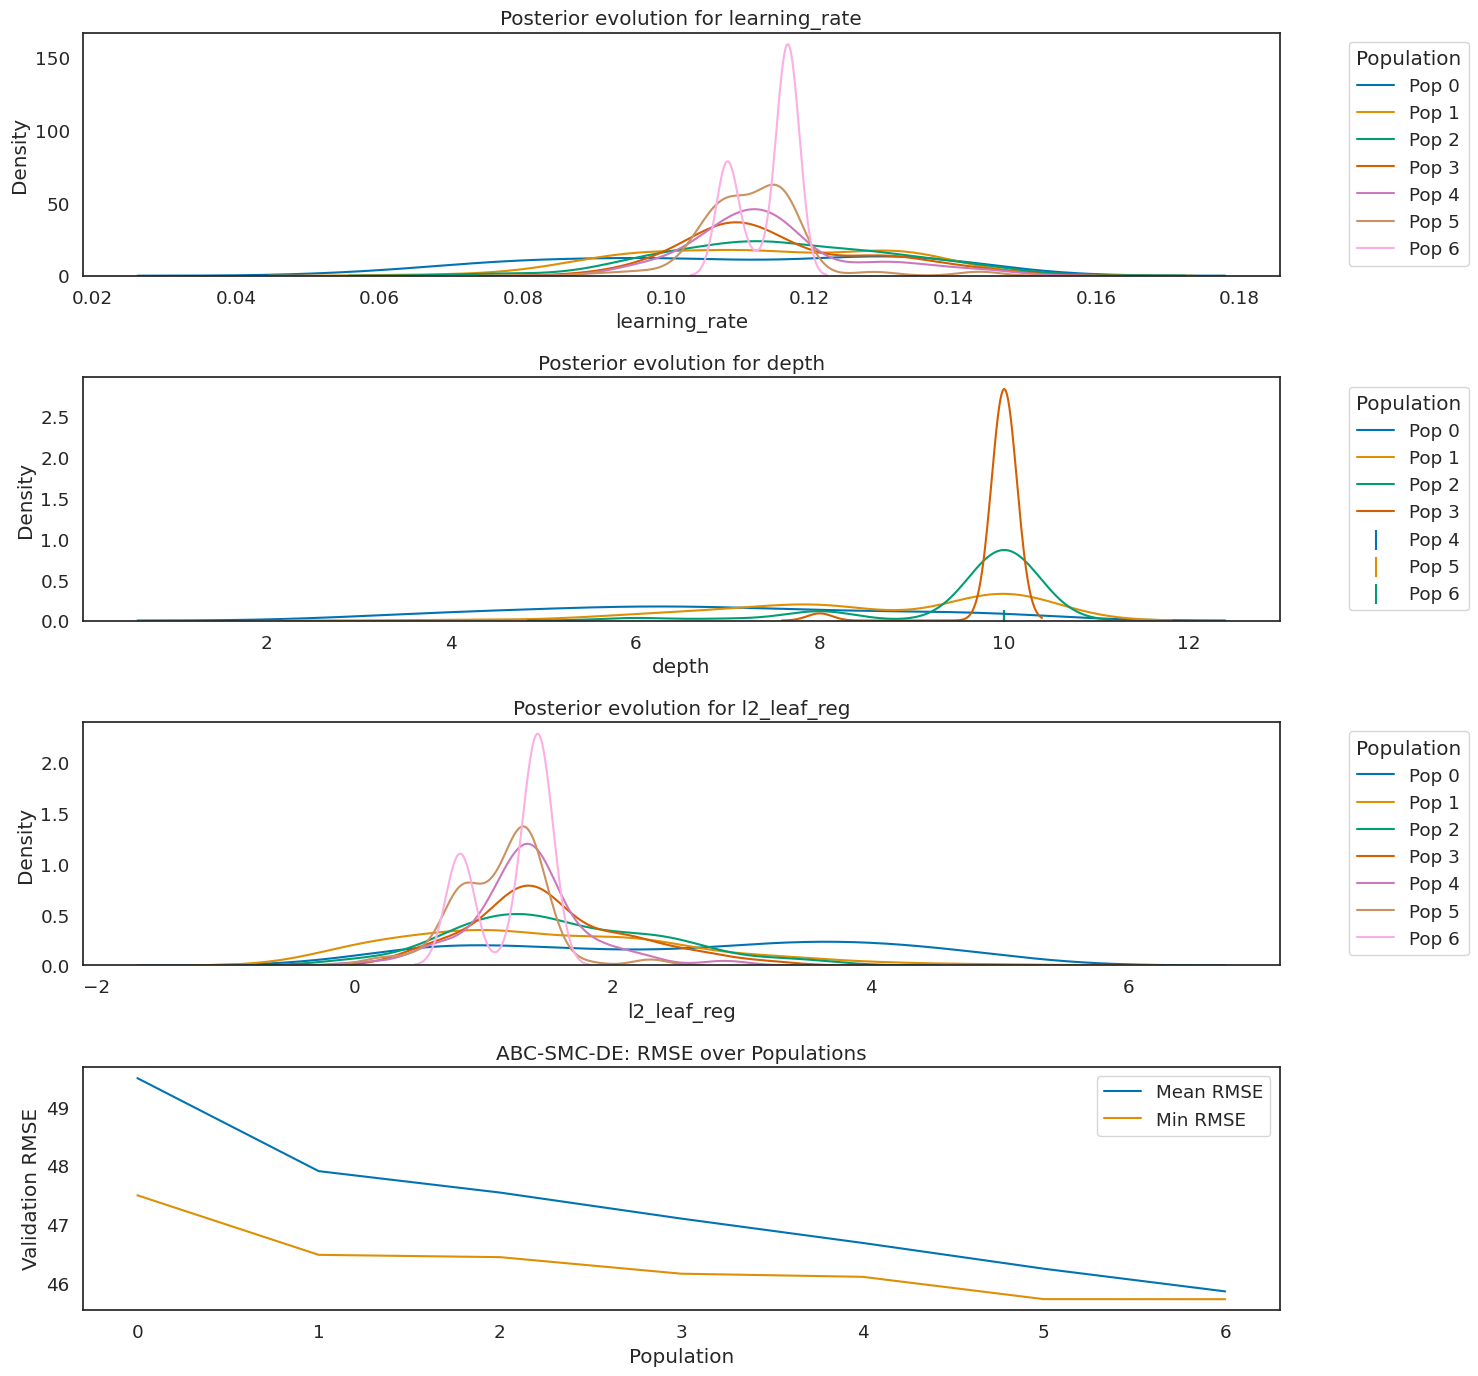

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("ctb1_results.csv")

df.rename(columns={"lr": "learning_rate", "reg": "l2_leaf_reg"}, inplace=True)

sns.set(style="white", palette="colorblind", font_scale=1.2)

fig, axs = plt.subplots(4, 1, figsize=(15, 14), sharex=False)

for pop, group in df.groupby("population"):
    if group["learning_rate"].nunique() > 1:
        sns.kdeplot(data=group, x="learning_rate", ax=axs[0], label=f"Pop {pop}")
    else:
        axs[0].scatter([group["learning_rate"].iloc[0]], [0.01], label=f"Pop {pop}", marker='|', s=200)
axs[0].legend(title="Population", bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].set_title("Posterior evolution for learning_rate")

for pop, group in df.groupby("population"):
    if group["depth"].nunique() > 1:
        sns.kdeplot(data=group, x="depth", ax=axs[1], label=f"Pop {pop}")
    else:
        axs[1].scatter([group["depth"].iloc[0]], [0.01], label=f"Pop {pop}", marker='|', s=200)
axs[1].legend(title="Population", bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].set_title("Posterior evolution for depth")

for pop, group in df.groupby("population"):
    if group["l2_leaf_reg"].nunique() > 1:
        sns.kdeplot(data=group, x="l2_leaf_reg", ax=axs[2], label=f"Pop {pop}")
    else:
        axs[2].scatter([group["l2_leaf_reg"].iloc[0]], [0.01], label=f"Pop {pop}", marker='|', s=200)
axs[2].legend(title="Population", bbox_to_anchor=(1.05, 1), loc='upper left')
axs[2].set_title("Posterior evolution for l2_leaf_reg")

mean_rmse = df.groupby("population")["RMSE"].mean()
min_rmse = df.groupby("population")["RMSE"].min()

axs[3].plot(mean_rmse.index, mean_rmse.values, label="Mean RMSE")
axs[3].plot(min_rmse.index, min_rmse.values, label="Min RMSE")
axs[3].set_title("ABC-SMC-DE: RMSE over Populations")
axs[3].set_xlabel("Population")
axs[3].set_ylabel("Validation RMSE")
axs[3].legend()

plt.tight_layout()
plt.show()


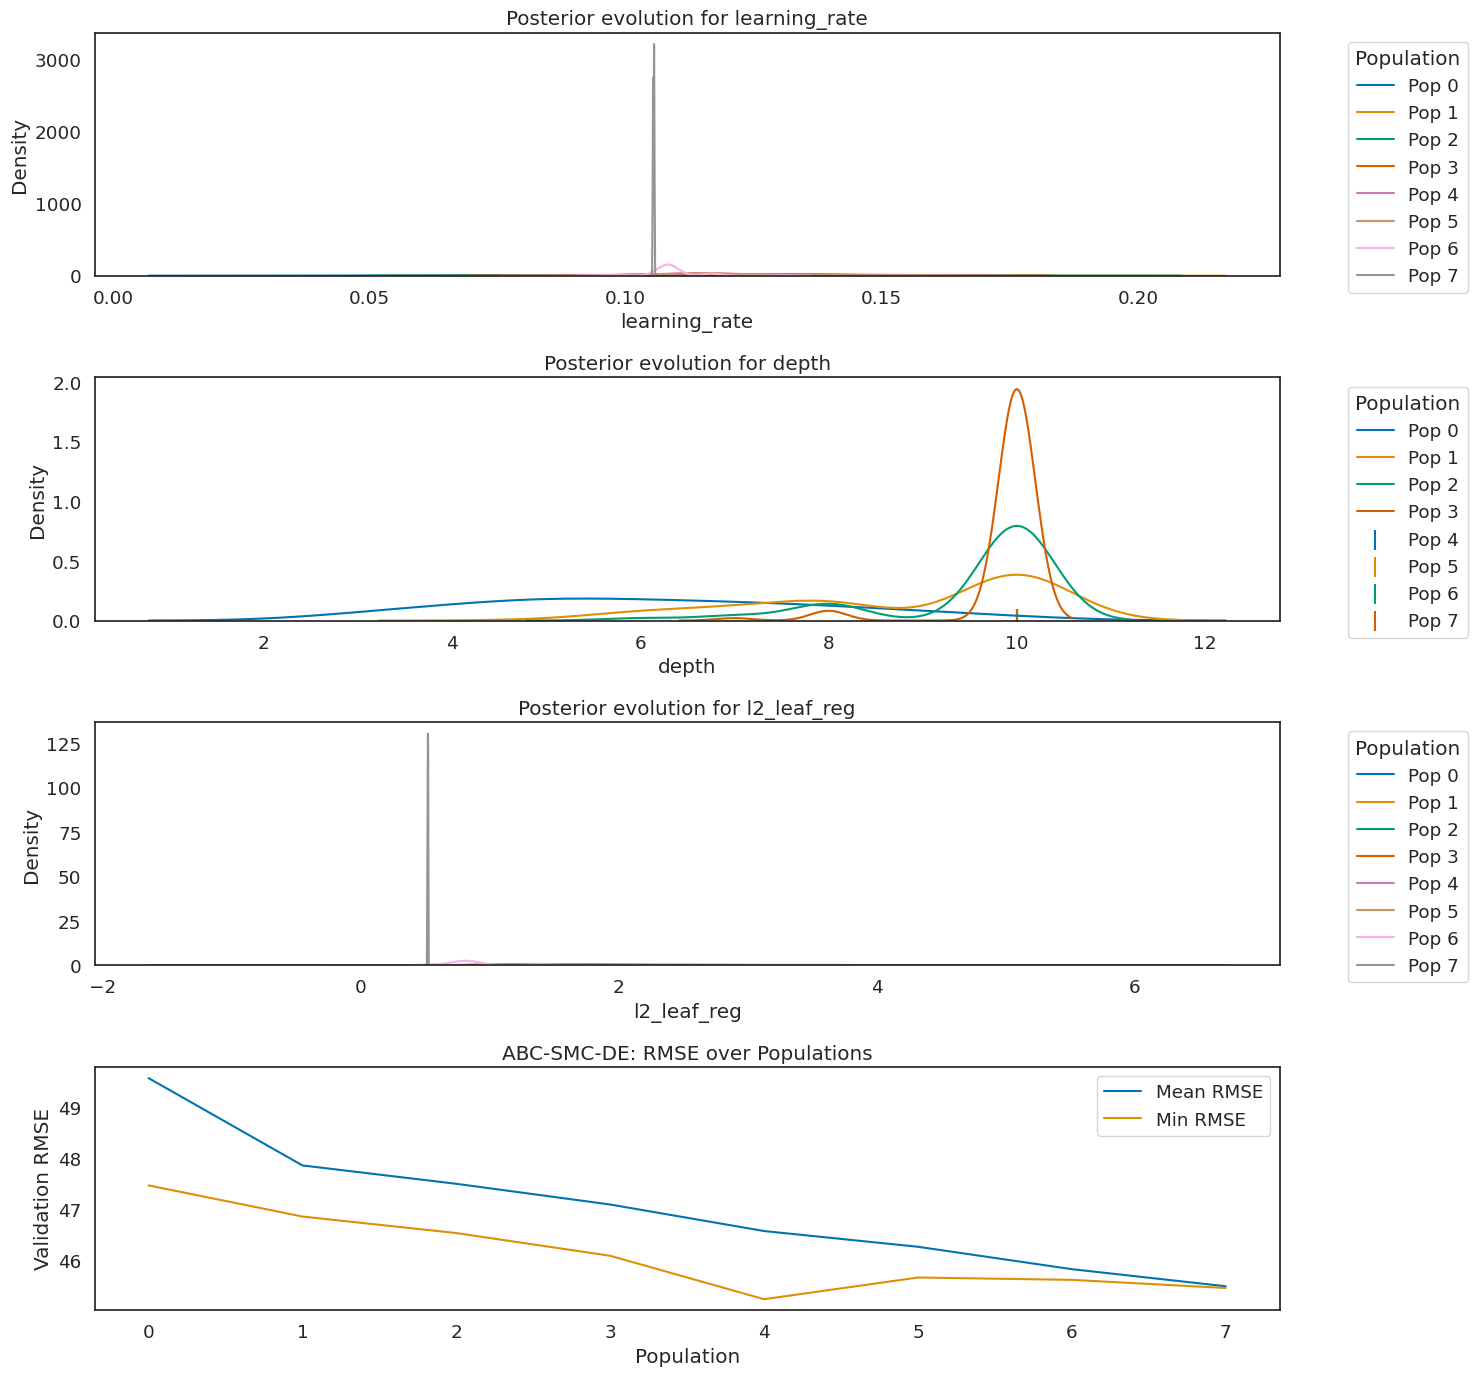

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("rtb1_results.csv")

df.rename(columns={"lr": "learning_rate", "reg": "l2_leaf_reg"}, inplace=True)

sns.set(style="white", palette="colorblind", font_scale=1.2)

fig, axs = plt.subplots(4, 1, figsize=(15, 14), sharex=False)

for pop, group in df.groupby("population"):
    if group["learning_rate"].nunique() > 1:
        sns.kdeplot(data=group, x="learning_rate", ax=axs[0], label=f"Pop {pop}")
    else:
        axs[0].scatter([group["learning_rate"].iloc[0]], [0.01], label=f"Pop {pop}", marker='|', s=200)
axs[0].legend(title="Population", bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].set_title("Posterior evolution for learning_rate")

for pop, group in df.groupby("population"):
    if group["depth"].nunique() > 1:
        sns.kdeplot(data=group, x="depth", ax=axs[1], label=f"Pop {pop}")
    else:
        axs[1].scatter([group["depth"].iloc[0]], [0.01], label=f"Pop {pop}", marker='|', s=200)
axs[1].legend(title="Population", bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].set_title("Posterior evolution for depth")

for pop, group in df.groupby("population"):
    if group["l2_leaf_reg"].nunique() > 1:
        sns.kdeplot(data=group, x="l2_leaf_reg", ax=axs[2], label=f"Pop {pop}")
    else:
        axs[2].scatter([group["l2_leaf_reg"].iloc[0]], [0.01], label=f"Pop {pop}", marker='|', s=200)
axs[2].legend(title="Population", bbox_to_anchor=(1.05, 1), loc='upper left')
axs[2].set_title("Posterior evolution for l2_leaf_reg")


mean_rmse = df.groupby("population")["RMSE"].mean()
min_rmse = df.groupby("population")["RMSE"].min()

axs[3].plot(mean_rmse.index, mean_rmse.values, label="Mean RMSE")
axs[3].plot(min_rmse.index, min_rmse.values, label="Min RMSE")
axs[3].set_title("ABC-SMC-DE: RMSE over Populations")
axs[3].set_xlabel("Population")
axs[3].set_ylabel("Validation RMSE")
axs[3].legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
r1 = pd.read_csv("rand1_trials.csv")
print("rand/1 strategy: \n", r1)
b1 = pd.read_csv("best1_trials.csv")
print("\nbest/1 strategy: \n", b1)
ht = pd.read_csv("hybrid_trials.csv")
print("\nhybrid strategy: \n", ht)
ctb1 = pd.read_csv("ctb1_trials.csv")
print("\ncurrent_to_best/1 strategy: \n", ctb1)
rtb1 = pd.read_csv("rtb1_trials.csv")
print("\nrand_to_best/1 strategy: \n", rtb1)

rand/1 strategy: 
    population  epsilon  trials
0           0   50.848     500
1           1   48.427    1500
2           2   47.942    1500
3           3   47.458    3000
4           4   46.974    8500
5           5   46.490   17500

best/1 strategy: 
    population  epsilon  trials
0           0   50.848     500
1           1   48.427    1500
2           2   47.942    1500
3           3   47.458    3500
4           4   46.974    2500
5           5   46.490     500
6           6   46.005    1000
7           7   45.521    3500
8           8   45.037     500

hybrid strategy: 
    population  epsilon  trials
0           0   50.848     500
1           1   48.427    1000
2           2   47.942    1500
3           3   47.458    2500
4           4   46.974    5500
5           5   46.490   12500

current_to_best/1 strategy: 
    population  epsilon  trials
0           0   50.848     500
1           1   48.427    1000
2           2   47.942    1000
3           3   47.458    1000
4          

In [ ]:
import pandas as pd
r1 = pd.read_csv("rand1_trials.csv")
print("rand/1 strategy: \n", sum(r1["trials"]))
b1 = pd.read_csv("best1_trials.csv")
print("\nbest/1 strategy: \n", sum(b1["trials"]))
ht = pd.read_csv("hybrid_trials.csv")
print("\nhybrid strategy: \n", sum(ht["trials"]))
ctb1 = pd.read_csv("ctb1_trials.csv")
print("\ncurrent_to_best/1 strategy: \n", sum(ctb1["trials"]))
rtb1 = pd.read_csv("rtb1_trials.csv")
print("\nrand_to_best/1 strategy: \n", sum(rtb1["trials"]))

rand/1 strategy: 
 32500

best/1 strategy: 
 15000

hybrid strategy: 
 23500

current_to_best/1 strategy: 
 23500

rand_to_best/1 strategy: 
 52500


mean TSW    223.353808
dtype: float64

Standard deviation 86.84487403866027

min 90

max 475


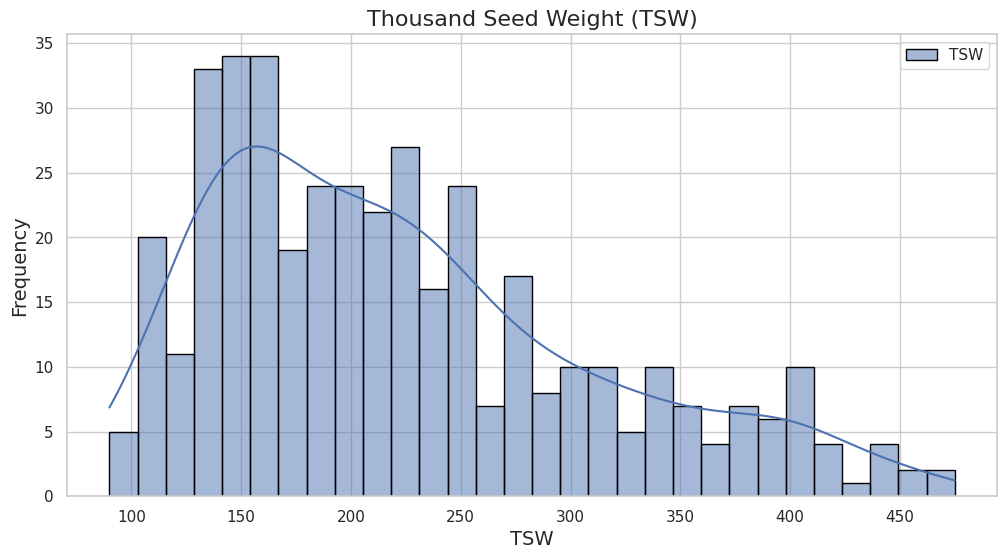

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics

tsw_data = pd.read_csv("y.csv")
print("mean", tsw_data.mean())
print("\nStandard deviation", statistics.stdev( tsw_data["TSW"]))
print("\nmin", min( tsw_data["TSW"]))
print("\nmax", max( tsw_data["TSW"]))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(tsw_data, bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Thousand Seed Weight (TSW)', fontsize=16)
plt.xlabel('TSW', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()
